In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import datetime
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import pickle

In [ ]:
# Read the dataset csv file 

hotel = pd.read_csv("hotel_bookings.csv")
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Check the dataset features types

hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Checking how many of the bookings were cancelled (our model will predict booking cancellations)
# Out of 119390 bookings, 44224 were cancelled and 75166 were not

hotel['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
cancelled_data = hotel[hotel['is_canceled'] == 1]

pd.set_option('display.max_columns', None)

cancelled_data

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
8,1,85,July,1,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,82.0,0,1,2015-05-06
9,1,75,July,1,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,0,No Deposit,Transient,105.5,0,0,2015-04-22
10,1,23,July,1,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,0,No Deposit,Transient,123.0,0,0,2015-06-23
27,1,60,July,1,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,0,No Deposit,Transient,107.0,0,2,2015-05-11
32,1,96,July,1,8,2,0.0,0,BB,Direct,Direct,0,0,0,E,0,No Deposit,Transient,108.3,0,2,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,1,25,May,6,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,E,0,No Deposit,Transient,125.0,0,0,2017-05-06
111355,1,4,June,5,0,1,0.0,0,BB,Corporate,Corporate,1,0,4,A,0,No Deposit,Transient,65.0,0,0,2017-06-05
111924,1,7,May,31,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,A,0,No Deposit,Transient,65.0,0,0,2017-05-31
111925,1,6,July,17,0,1,0.0,0,BB,Corporate,Corporate,1,1,1,A,0,No Deposit,Transient,65.0,0,0,2017-07-17


In [ ]:
# Fill the null values with 0

hotel.fillna(0, inplace=True)

In [ ]:
# Adults, babies and children can't be zero at same time
# Dropping all of the rows having all these zeroes at the same time

filter = (hotel.children == 0) & (hotel.adults == 0) & (hotel.babies == 0)
hotel[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
hotel = hotel[~filter]
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# GUESTS PER MONTH
# I am checking which months of the year are the busiest (with the most guests)

guests_count = hotel.groupby(['arrival_date_month'])['adults', 'children', 'babies'].sum().reset_index()
guests_count


/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/2242288254.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  guests_count = hotel.groupby(['arrival_date_month'])['adults', 'children', 'babies'].sum().reset_index()


,arrival_date_month,adults,children,babies
0,April,20806,1141.0,53
1,August,27795,2780.0,196
2,December,12382,736.0,78
3,February,14450,790.0,59
4,January,10024,452.0,48
5,July,25164,2322.0,121
6,June,20353,1057.0,71
7,March,17675,700.0,57
8,May,21539,845.0,72
9,November,11488,279.0,45


In [ ]:
guests_count['total_guests'] = guests_count['adults'] + guests_count['children'] + guests_count['babies']
guests_count_sorted = guests_count.sort_values(by='total_guests')
guests_count_sorted

,arrival_date_month,adults,children,babies,total_guests
4,January,10024,452.0,48,10524.0
9,November,11488,279.0,45,11812.0
2,December,12382,736.0,78,13196.0
3,February,14450,790.0,59,15299.0
7,March,17675,700.0,57,18432.0
11,September,19681,598.0,87,20366.0
10,October,20279,703.0,62,21044.0
6,June,20353,1057.0,71,21481.0
0,April,20806,1141.0,53,22000.0
8,May,21539,845.0,72,22456.0


In [ ]:
# AVG PRICE PER ROOM PER MONTH 
# Checking the average daily rate for a room throughout the year, to see if these patterns can be correlated with the cancellation trend

avg_price = hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()
avg_price_sorted = avg_price.sort_values(by='adr')
avg_price_sorted

,arrival_date_month,adr
4,January,70.451631
3,February,73.717054
9,November,73.966448
7,March,80.884282
2,December,81.321256
10,October,88.011401
0,April,100.468146
11,September,105.127290
8,May,108.771400
6,June,116.761489


In [ ]:
# CORRELATIONS
# Checking the correlation between all of the features in the dataset

correlation_matrix = hotel.corr()
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


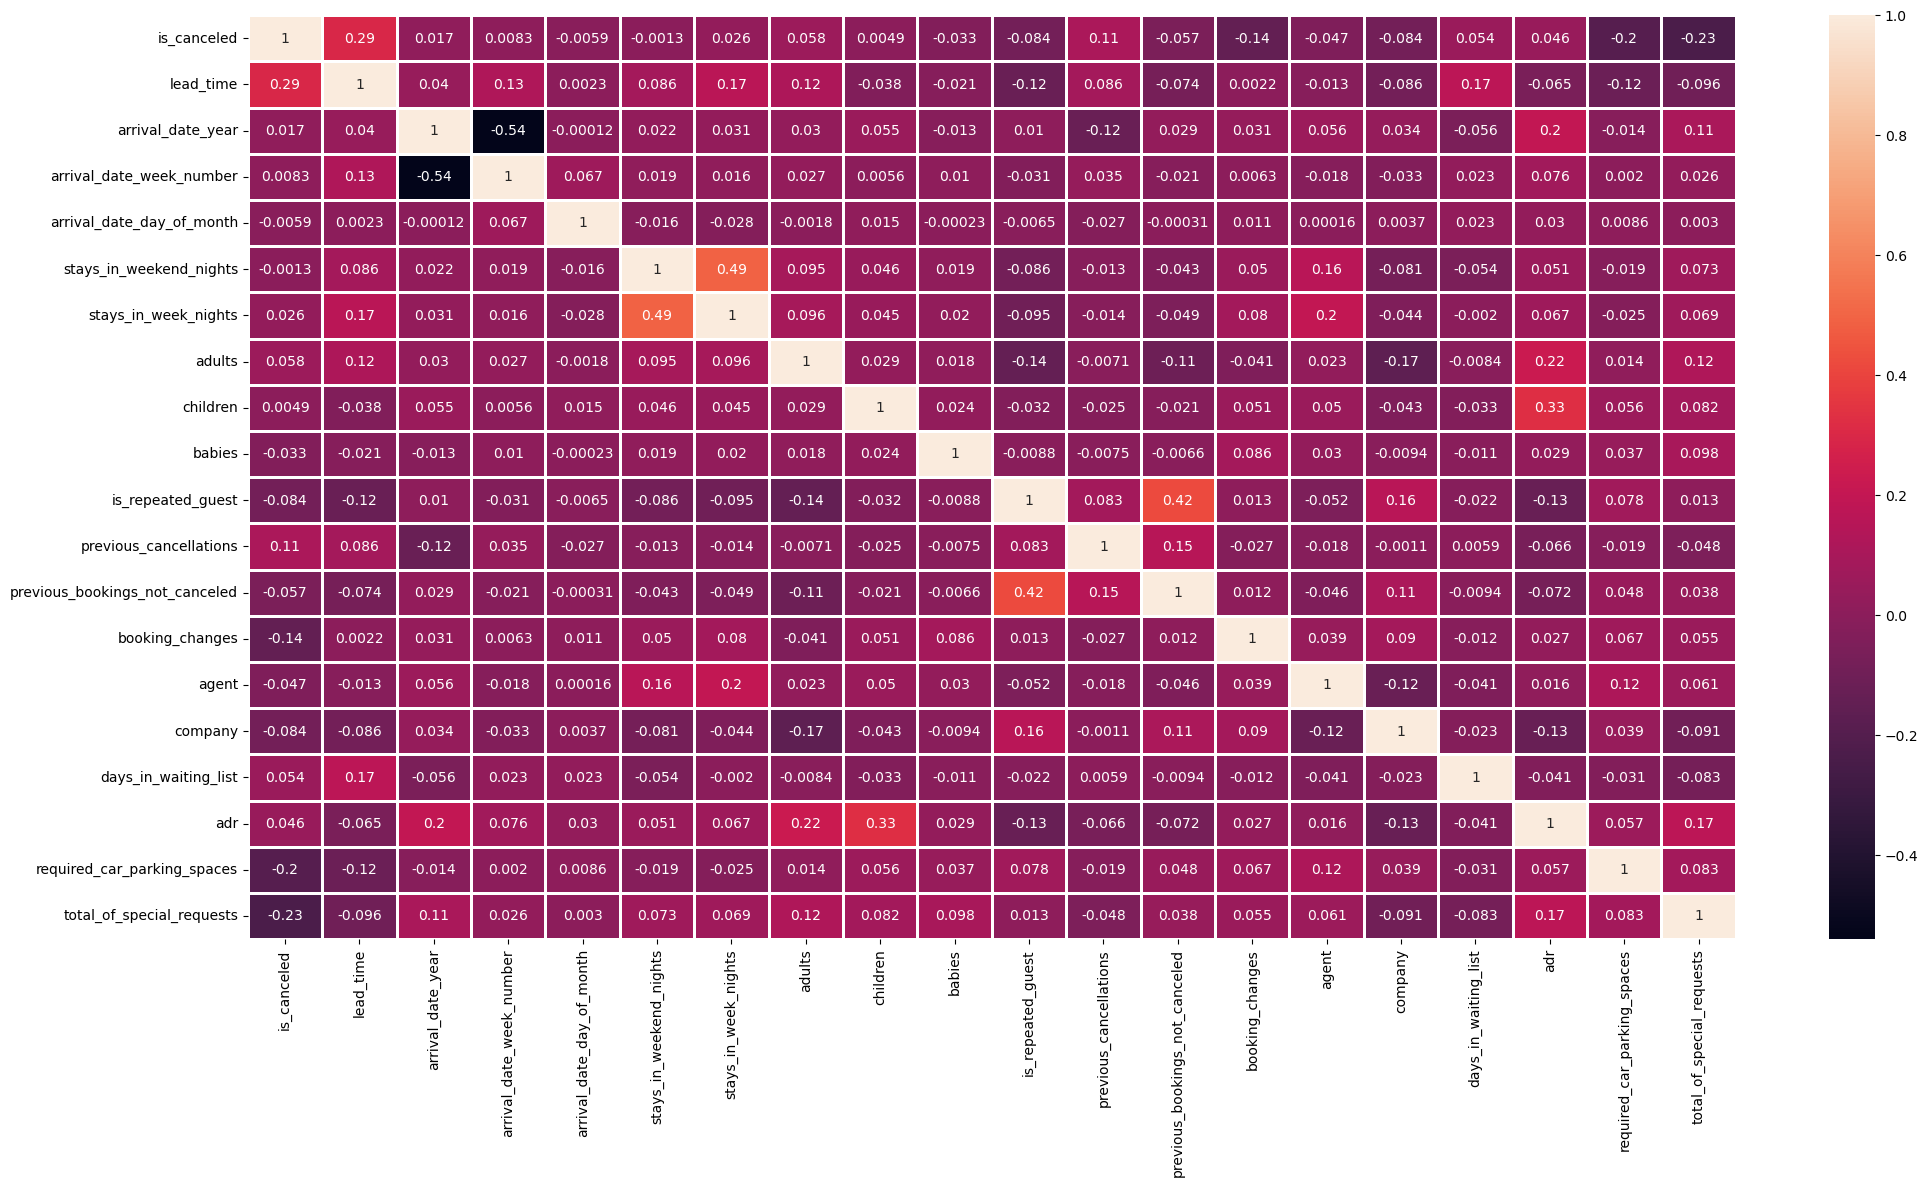

In [ ]:
# Plotting a correlation heatmap to see which features are more/less correlated with each other

plt.figure(figsize = (24, 12))

corr = hotel.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
# Correlation with the "is_canceled" column
# The "is_canceled" column is our target, as our model will predict if a booking will be cancelled or not

correlation = hotel.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
# Drop not useful columns (based on the correlation with cancellation)

columns_to_drop = ['agent', 'company', 'hotel', 'days_in_waiting_list', 'arrival_date_year', 'arrival_date_week_number', 'assigned_room_type', 
                    'stays_in_weekend_nights', 'reservation_status', 'country']

hotel.drop(columns_to_drop, axis = 1, inplace = True)

hotel.head()

/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/2853755150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.drop(columns_to_drop, axis = 1, inplace = True)


,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,342,July,1,0,2,0.0,0,BB,Direct,...,0,0,C,3,No Deposit,Transient,0.0,0,0,2015-07-01
1,0,737,July,1,0,2,0.0,0,BB,Direct,...,0,0,C,4,No Deposit,Transient,0.0,0,0,2015-07-01
2,0,7,July,1,1,1,0.0,0,BB,Direct,...,0,0,A,0,No Deposit,Transient,75.0,0,0,2015-07-02
3,0,13,July,1,1,1,0.0,0,BB,Corporate,...,0,0,A,0,No Deposit,Transient,75.0,0,0,2015-07-02
4,0,14,July,1,2,2,0.0,0,BB,Online TA,...,0,0,A,0,No Deposit,Transient,98.0,0,1,2015-07-03


In [ ]:
# Separating Categorical and Numerical Columns

categorical = [col for col in hotel.columns if hotel[col].dtype == 'O']
categorical

['arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
categorical_hotel = hotel[categorical]
categorical_hotel.head()

,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
# Converting day, month and year to datetime, in order to have columns as numerical

categorical_hotel['reservation_status_date'] = pd.to_datetime(categorical_hotel['reservation_status_date'])

categorical_hotel['year'] = categorical_hotel['reservation_status_date'].dt.year
categorical_hotel['reservation_month'] = categorical_hotel['reservation_status_date'].dt.month
categorical_hotel['reservation_day'] = categorical_hotel['reservation_status_date'].dt.day

/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/3748153114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_hotel['reservation_status_date'] = pd.to_datetime(categorical_hotel['reservation_status_date'])
/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/3748153114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_hotel['year'] = categorical_hotel['reservation_status_date'].dt.year
/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/37

In [ ]:
# Decided to drop some more columns that had low correlations and weren't helping much

categorical_hotel.drop(['reservation_status_date','arrival_date_month', 'year', 'reserved_room_type'] , axis = 1, inplace = True)

/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/2319807649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_hotel.drop(['reservation_status_date','arrival_date_month', 'year', 'reserved_room_type'] , axis = 1, inplace = True)


In [ ]:
categorical_hotel

,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_month,reservation_day
0,BB,Direct,Direct,No Deposit,Transient,7,1
1,BB,Direct,Direct,No Deposit,Transient,7,1
2,BB,Direct,Direct,No Deposit,Transient,7,2
3,BB,Corporate,Corporate,No Deposit,Transient,7,2
4,BB,Online TA,TA/TO,No Deposit,Transient,7,3
...,...,...,...,...,...,...,...
119385,BB,Offline TA/TO,TA/TO,No Deposit,Transient,9,6
119386,BB,Online TA,TA/TO,No Deposit,Transient,9,7
119387,BB,Online TA,TA/TO,No Deposit,Transient,9,7
119388,BB,Online TA,TA/TO,No Deposit,Transient,9,7


In [ ]:
# Extract all unique values from all columns in order to assign values to each of them, turning the columns to numerical

for col in categorical_hotel.columns:
    print(f"{col}: \n{categorical_hotel[col].unique()}\n")

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

reservation_day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
# Replacing the words with numbers

categorical_hotel['meal'] = categorical_hotel['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categorical_hotel['market_segment'] = categorical_hotel['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

categorical_hotel['distribution_channel'] = categorical_hotel['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

categorical_hotel['deposit_type'] = categorical_hotel['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})

categorical_hotel['customer_type'] = categorical_hotel['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/2866430901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_hotel['meal'] = categorical_hotel['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
/var/folders/d9/783c_j055nj0b0y037qm_1zc0000gn/T/ipykernel_28060/2866430901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_hotel['market_segment'] = categorical_hotel['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,

In [ ]:
# categorical_hotel columns now are all numerical

categorical_hotel

,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_month,reservation_day
0,0,0,0,0,0,7,1
1,0,0,0,0,0,7,1
2,0,0,0,0,0,7,2
3,0,1,1,0,0,7,2
4,0,2,2,0,0,7,3
...,...,...,...,...,...,...,...
119385,0,3,2,0,0,9,6
119386,0,2,2,0,0,9,7
119387,0,2,2,0,0,9,7
119388,0,2,2,0,0,9,7


In [ ]:
# Separate the numerical columns from the categorical ones

cat_cols= hotel[['meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status_date', 'arrival_date_month', 'reserved_room_type']]

numerical_hotel = hotel.drop(columns = cat_cols, axis = 1)
numerical_hotel.drop('is_canceled', axis = 1, inplace = True)
numerical_hotel

,lead_time,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,342,1,0,2,0.0,0,0,0,0,3,0.00,0,0
1,737,1,0,2,0.0,0,0,0,0,4,0.00,0,0
2,7,1,1,1,0.0,0,0,0,0,0,75.00,0,0
3,13,1,1,1,0.0,0,0,0,0,0,75.00,0,0
4,14,1,2,2,0.0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,30,5,2,0.0,0,0,0,0,0,96.14,0,0
119386,102,31,5,3,0.0,0,0,0,0,0,225.43,0,2
119387,34,31,5,2,0.0,0,0,0,0,0,157.71,0,4
119388,109,31,5,2,0.0,0,0,0,0,0,104.40,0,0


In [ ]:
numerical_hotel

,lead_time,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,342,1,0,2,0.0,0,0,0,0,3,0.00,0,0
1,737,1,0,2,0.0,0,0,0,0,4,0.00,0,0
2,7,1,1,1,0.0,0,0,0,0,0,75.00,0,0
3,13,1,1,1,0.0,0,0,0,0,0,75.00,0,0
4,14,1,2,2,0.0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,30,5,2,0.0,0,0,0,0,0,96.14,0,0
119386,102,31,5,3,0.0,0,0,0,0,0,225.43,0,2
119387,34,31,5,2,0.0,0,0,0,0,0,157.71,0,4
119388,109,31,5,2,0.0,0,0,0,0,0,104.40,0,0


In [ ]:
# Checking which features will need to be normalized 

numerical_hotel.var()

lead_time                         11422.361808
arrival_date_day_of_month            77.107192
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
booking_changes                       0.407688
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [ ]:
# Normalize data that needs normalizing

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['lead_time', 'arrival_date_day_of_month', 'previous_bookings_not_canceled', 'adr', 'stays_in_week_nights']
scaler = MinMaxScaler()
numerical_hotel[columns_to_normalize] = scaler.fit_transform(numerical_hotel[columns_to_normalize])

In [ ]:
# Checking if all values are in the same scale 

numerical_hotel.var()

lead_time                         0.021029
arrival_date_day_of_month         0.085675
stays_in_week_nights              0.001440
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    0.000433
booking_changes                   0.407688
adr                               0.000087
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [ ]:
# Filling in all null values in the numerical_hotel['adr']

numerical_hotel['adr'] = numerical_hotel['adr'].fillna(value = numerical_hotel['adr'].mean())

In [ ]:
# Double checking if all values are numerical

numerical_hotel.dtypes

lead_time                         float64
arrival_date_day_of_month         float64
stays_in_week_nights              float64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled    float64
booking_changes                     int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [ ]:
# Double checking if all values are numerical

categorical_hotel.dtypes

meal                    int64
market_segment          int64
distribution_channel    int64
deposit_type            int64
customer_type           int64
reservation_month       int64
reservation_day         int64
dtype: object

In [ ]:
# Concat both categorical and numerical datasets and create the features and labels variables that will be used for model training

features = pd.concat([categorical_hotel, numerical_hotel], axis = 1)
labels = hotel['is_canceled']

In [ ]:
# Split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)

In [ ]:
# TESTING THE MODELS

# Tested multiple models 

In [ ]:
# Tested the model using Randomized Search CV, which gave me the best parameters to use with XGBoost

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param_dist = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.2, 0.3],'n_estimators': [100, 200, 300],}

xgb = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, cv=3, n_iter=10)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# XGBOOST Classifier (WITH RANDOM SEARCH PARAMETERS)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)

xgb = XGBClassifier(learning_rate = 0.3, max_depth = 7, n_estimators = 300)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XG Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XG Boost Classifier is : 0.9830970556161396
Confusion Matrix : 
[[15053    72]
 [  331  8386]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15125
           1       0.99      0.96      0.98      8717

    accuracy                           0.98     23842
   macro avg       0.98      0.98      0.98     23842
weighted avg       0.98      0.98      0.98     23842



In [ ]:
15053 /(15053+72)

0.9952396694214876

In [ ]:
xgb.score(X_train, y_train)

0.9970430333025753

In [ ]:
# Pickling the model in order to use it in other files (such as my streamlit files for the web app I developed)

import pickle

# pickle.dump(your_model, open("name_you_want.p", "wb"))
pickle.dump(xgb, open("cancellation_model.p", "wb"))